In [12]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 559.3 kB/s eta 0:00:05
   ------- -------------------------------- 0.5/2.9 MB 559.3 kB/s eta 0:00:05
   ---------- ----------------------------- 0.8/2.9 MB 609.8 kB/s eta 0:00:04
   -------------- ------------------------- 1.0/2.9 MB 687.8 kB/s eta 0:00:03
   -------------- ------------------------- 1.0/2.9 MB 687.8 kB/s eta 0:00:03
   ------------------ --------------------- 1.3/2.9 MB 682.9 kB/s eta 0:00:03
   --------------------- ------------------ 1.6/2.9 MB 718.1 kB/s eta 0:00:02
   --------------------- ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.0 MB 2.1 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/12.0 MB 2.2 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.0 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.0 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/12.0 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.4/12.0 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.0 MB 1.1 MB/s eta 0:00:09
   ------- -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install rouge-score

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24971 sha256=9d836366d1338d31e178efbeebbf9d466e74742555bc1714bcc04c3d10452f6d
  Stored in directory: c:\users\abhisek\appdata\local\pip\cache\wheels\44\af\da\5ffc433e2786f0b1a9c6f458d5fb8f611d8eb332387f18698f
Successfully built rouge-score
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'rouge-score' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'rouge-score'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [1]:
# If you're in Colab, uncomment:
# !pip install datasets transformers pyyaml tqdm

import os
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from datasets import load_dataset
from transformers import AutoTokenizer

from utils_tf import (
    set_seed,
    load_config,
    get_device,
    build_tf_dataset,
)
from model import CrossModalStoryModelTF


In [2]:
CONFIG_PATH = "config.yaml"

cfg = load_config(CONFIG_PATH)
print("Config sections:", cfg.keys())

set_seed(42)

train_cfg = cfg["training"]
dataset_cfg = cfg["dataset"]
model_cfg = cfg["model"]

device_str = get_device(train_cfg.get("device", "auto"))
print("Device string:", device_str)
print("Available GPUs:", tf.config.list_physical_devices("GPU"))


Config sections: dict_keys(['dataset', 'model', 'training'])
Device string: cpu
Available GPUs: []


In [3]:
hf_name = dataset_cfg["hf_name"]
print("Loading HF dataset:", hf_name)

ds_dict = load_dataset(hf_name)
print(ds_dict)

train_split_name = dataset_cfg.get("train_split", "train")
val_split_name = dataset_cfg.get("val_split", "validation")

hf_train = ds_dict[train_split_name]
hf_val = ds_dict[val_split_name] if val_split_name in ds_dict else None

print("Train size:", len(hf_train))
if hf_val is not None:
    print("Val size:", len(hf_val))

example = hf_train[0]
print("\nExample keys:", example.keys())
for k, v in example.items():
    print(f"{k}: {type(v)}")


Loading HF dataset: daniel3303/StoryReasoning
DatasetDict({
    train: Dataset({
        features: ['story_id', 'images', 'frame_count', 'chain_of_thought', 'story'],
        num_rows: 3552
    })
    test: Dataset({
        features: ['story_id', 'images', 'frame_count', 'chain_of_thought', 'story'],
        num_rows: 626
    })
})
Train size: 3552

Example keys: dict_keys(['story_id', 'images', 'frame_count', 'chain_of_thought', 'story'])
story_id: <class 'str'>
images: <class 'list'>
frame_count: <class 'int'>
chain_of_thought: <class 'str'>
story: <class 'str'>
DatasetDict({
    train: Dataset({
        features: ['story_id', 'images', 'frame_count', 'chain_of_thought', 'story'],
        num_rows: 3552
    })
    test: Dataset({
        features: ['story_id', 'images', 'frame_count', 'chain_of_thought', 'story'],
        num_rows: 626
    })
})
Train size: 3552

Example keys: dict_keys(['story_id', 'images', 'frame_count', 'chain_of_thought', 'story'])
story_id: <class 'str'>
image

Using keys -> frames_key: images, captions_key: story, reason_key: reason
Story 0 has 17 frames.

First few captions:
[0] <
[1] g
[2] d
[3] i


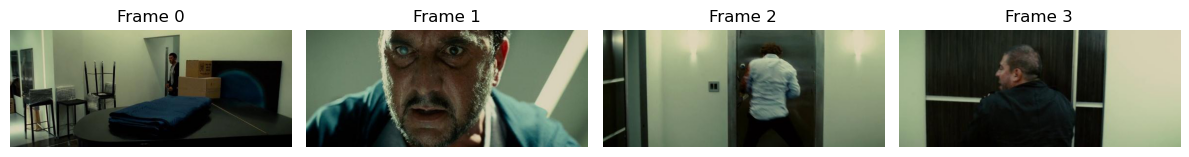

In [4]:
# Determine which keys exist in the HF example (be robust to dataset variants)
# Ensure `example` is available (from previous cell)
try:
    example
except NameError:
    example = hf_train[0]
candidate_frame_keys = ['frames', 'images', 'frame_paths', 'image_list', 'image']
candidate_caption_keys = ['captions', 'caption', 'text', 'story', 'texts']
frames_key = next((k for k in candidate_frame_keys if k in example.keys()), dataset_cfg.get('frames_key', 'frames'))
captions_key = next((k for k in candidate_caption_keys if k in example.keys()), dataset_cfg.get('captions_key', 'captions'))
reason_key = dataset_cfg.get('reason_key', 'reason')
print(f'Using keys -> frames_key: {frames_key}, captions_key: {captions_key}, reason_key: {reason_key}')

idx = 0  # change to inspect other stories
story = hf_train[idx]

frames = story[frames_key]
captions = story[captions_key]
reason = story.get(reason_key, None)

print(f"Story {idx} has {len(frames)} frames.")
print("\nFirst few captions:")
for i, c in enumerate(captions[:4]):
    print(f"[{i}] {c}")

if reason is not None:
    print("\nReason / Explanation:\n", reason)

# Plot first few frames
n_show = min(4, len(frames))
plt.figure(figsize=(3 * n_show, 3))
for i in range(n_show):
    plt.subplot(1, n_show, i + 1)
    plt.imshow(frames[i])
    plt.axis("off")
    plt.title(f"Frame {i}")
plt.tight_layout()
plt.show()


In [5]:
# BERT tokenizer
tokenizer_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

use_reason = model_cfg.get("use_reason_in_fusion", False)
print("use_reason_in_fusion:", use_reason)
# Update cfg dataset keys with detected keys so src.train uses correct field names
cfg['dataset']['frames_key'] = frames_key
cfg['dataset']['captions_key'] = captions_key

# Train dataset
train_ds_raw, train_windows = build_tf_dataset(
    hf_dataset=hf_train,
    cfg=cfg,
    tokenizer=tokenizer,
    use_reason=use_reason,
    shuffle=True,
)

print("Number of train windows:", train_windows)

# Val dataset (if available)
if hf_val is not None:
    val_ds_raw, val_windows = build_tf_dataset(
        hf_dataset=hf_val,
        cfg=cfg,
        tokenizer=tokenizer,
        use_reason=use_reason,
        shuffle=False,
    )
    print("Number of val windows:", val_windows)
else:
    val_ds_raw, val_windows = None, 0


use_reason_in_fusion: False
[Dataset] Built 33543 windows from 3552 stories.
Number of train windows: 33543
[Dataset] Built 33543 windows from 3552 stories.
Number of train windows: 33543


In [6]:
batch_size = dataset_cfg["batch_size"]

train_steps = 50
train_ds = train_ds_raw.batch(batch_size).prefetch(tf.data.AUTOTUNE)

if val_ds_raw is not None:
    val_steps = 50
    val_ds = val_ds_raw.batch(batch_size).prefetch(tf.data.AUTOTUNE)
else:
    val_steps = 0
    val_ds = None

# Inspect one batch
batch = next(iter(train_ds))
print("Batch keys:", batch.keys())
for k, v in batch.items():
    print(k, v.shape, v.dtype)


Batch keys: dict_keys(['images', 'caption_ids', 'caption_mask', 'tgt_caption_ids'])
images (16, 3, 128, 128, 3) <dtype: 'float32'>
caption_ids (16, 3, 32) <dtype: 'int32'>
caption_mask (16, 3, 32) <dtype: 'int32'>
tgt_caption_ids (16, 32) <dtype: 'int32'>


In [7]:
model = CrossModalStoryModelTF(cfg)

images = batch["images"]              # (B, T, H, W, 3)
caption_ids = batch["caption_ids"]    # (B, T, L)
caption_mask = batch["caption_mask"]  # (B, T, L)
tgt_caption_ids = batch["tgt_caption_ids"]  # (B, L_out)

reason_ids = batch.get("reason_ids", None)
reason_mask = batch.get("reason_mask", None)

logits, extra = model(
    images=images,
    caption_ids=caption_ids,
    tgt_caption_ids=tgt_caption_ids,
    caption_mask=caption_mask,
    reason_ids=reason_ids,
    reason_mask=reason_mask,
    training=False,
)

print("Logits shape:", logits.shape)  # (B, L_out, vocab_size)


Logits shape: (16, 32, 30522)


In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction="none"
)
pad_token_id = model_cfg["pad_token_id"]

def train_one_epoch(
    model,
    dataset,
    steps,
    optimizer,
    pad_token_id,
    log_interval,
    epoch,
):
    running_loss = 0.0
    total_tokens = 0.0

    pbar = tf.keras.utils.Progbar(steps, stateful_metrics=["loss", "ppl"])

    it = iter(dataset)
    for step in range(1, steps + 1):
        try:
            batch = next(it)
        except StopIteration:
            break

        images = batch["images"]
        caption_ids = batch["caption_ids"]
        caption_mask = batch["caption_mask"]
        tgt_caption_ids = batch["tgt_caption_ids"]

        reason_ids = batch.get("reason_ids", None)
        reason_mask = batch.get("reason_mask", None)

        with tf.GradientTape() as tape:
            logits, _ = model(
                images=images,
                caption_ids=caption_ids,
                tgt_caption_ids=tgt_caption_ids,
                caption_mask=caption_mask,
                reason_ids=reason_ids,
                reason_mask=reason_mask,
                training=True,
            )

            # loss per position
            loss_per_pos = loss_fn(tgt_caption_ids, logits)  # (B, L_out)
            mask = tf.cast(tf.not_equal(tgt_caption_ids, pad_token_id), tf.float32)
            loss_masked = loss_per_pos * mask

            batch_loss_sum = tf.reduce_sum(loss_masked)
            batch_tokens = tf.reduce_sum(mask)

            loss = batch_loss_sum / tf.maximum(batch_tokens, 1.0)

        grads = tape.gradient(loss, model.trainable_variables)
        grads, _ = tf.clip_by_global_norm(grads, train_cfg.get("grad_clip", 1.0))
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        running_loss += batch_loss_sum.numpy()
        total_tokens += batch_tokens.numpy()

        if step % log_interval == 0 or step == steps:
            avg_loss = running_loss / max(total_tokens, 1.0)
            ppl = math.exp(avg_loss) if avg_loss < 20 else float("inf")
            pbar.update(
                step,
                values=[
                    ("loss", avg_loss),
                    ("ppl", ppl),
                ],
            )

    epoch_loss = running_loss / max(total_tokens, 1.0)
    epoch_ppl = math.exp(epoch_loss) if epoch_loss < 20 else float("inf")
    print(f"\n[Train] Epoch {epoch+1}  Loss: {epoch_loss:.4f}  PPL: {epoch_ppl:.2f}")
    return epoch_loss, epoch_ppl


def evaluate(
    model,
    dataset,
    steps,
    pad_token_id,
    split_name="Val",
):
    running_loss = 0.0
    total_tokens = 0.0

    it = iter(dataset)
    for step in range(1, steps + 1):
        try:
            batch = next(it)
        except StopIteration:
            break

        images = batch["images"]
        caption_ids = batch["caption_ids"]
        caption_mask = batch["caption_mask"]
        tgt_caption_ids = batch["tgt_caption_ids"]

        reason_ids = batch.get("reason_ids", None)
        reason_mask = batch.get("reason_mask", None)

        logits, _ = model(
            images=images,
            caption_ids=caption_ids,
            tgt_caption_ids=tgt_caption_ids,
            caption_mask=caption_mask,
            reason_ids=reason_ids,
            reason_mask=reason_mask,
            training=False,
        )

        loss_per_pos = loss_fn(tgt_caption_ids, logits)
        mask = tf.cast(tf.not_equal(tgt_caption_ids, pad_token_id), tf.float32)
        loss_masked = loss_per_pos * mask

        batch_loss_sum = tf.reduce_sum(loss_masked).numpy()
        batch_tokens = tf.reduce_sum(mask).numpy()

        running_loss += batch_loss_sum
        total_tokens += batch_tokens

    avg_loss = running_loss / max(total_tokens, 1.0)
    ppl = math.exp(avg_loss) if avg_loss < 20 else float("inf")
    print(f"[{split_name}] Loss: {avg_loss:.4f}  PPL: {ppl:.2f}")
    return avg_loss, ppl


In [13]:
lr = train_cfg.get("lr", 1e-4)
epochs = train_cfg.get("epochs", 5)
log_interval = train_cfg.get("log_interval", 50)
save_dir = train_cfg.get("save_dir", "results_tf/checkpoints")
os.makedirs(save_dir, exist_ok=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

ckpt = tf.train.Checkpoint(model=model, optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, directory=save_dir, max_to_keep=3)

best_val_loss = float("inf")

for epoch in range(epochs):
    print(f"\n===== Epoch {epoch+1}/{epochs} =====")
    train_loss, train_ppl = train_one_epoch(
        model=model,
        dataset=train_ds,
        steps=train_steps,
        optimizer=optimizer,
        pad_token_id=pad_token_id,
        log_interval=log_interval,
        epoch=epoch,
    )

    if val_ds is not None and val_steps > 0:
        val_loss, val_ppl = evaluate(
            model=model,
            dataset=val_ds,
            steps=val_steps,
            pad_token_id=pad_token_id,
            split_name="Val",
        )
    else:
        val_loss, val_ppl = train_loss, train_ppl

    ckpt_path = ckpt_manager.save()
    print("Saved checkpoint:", ckpt_path)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        # Ensure weights filename uses Keras convention ending in .weights.h5
        best_weights_path = os.path.join(save_dir, "best_model.weights.h5")
        model.save_weights(best_weights_path)
        print(f"New best model saved to {best_weights_path} (Val loss: {val_loss:.4f})")




===== Epoch 1/5 =====
[Epoch 1] Step 50/50 Loss: 4.1276  PPL: 62.03
[Train] Epoch 1  Loss: 4.1276  PPL: 62.03
[Epoch 1] Step 50/50 Loss: 4.1276  PPL: 62.03
[Train] Epoch 1  Loss: 4.1276  PPL: 62.03
Saved checkpoint: results_tf/checkpoints\ckpt-1
Saved checkpoint: results_tf/checkpoints\ckpt-1
New best model saved to results_tf/checkpoints\best_model.weights.h5 (Val loss: 4.1276)

===== Epoch 2/5 =====
New best model saved to results_tf/checkpoints\best_model.weights.h5 (Val loss: 4.1276)

===== Epoch 2/5 =====
[Epoch 2] Step 50/50 Loss: 1.5395  PPL: 4.66
[Train] Epoch 2  Loss: 1.5395  PPL: 4.66
[Epoch 2] Step 50/50 Loss: 1.5395  PPL: 4.66
[Train] Epoch 2  Loss: 1.5395  PPL: 4.66
Saved checkpoint: results_tf/checkpoints\ckpt-2
Saved checkpoint: results_tf/checkpoints\ckpt-2
New best model saved to results_tf/checkpoints\best_model.weights.h5 (Val loss: 1.5395)

===== Epoch 3/5 =====
New best model saved to results_tf/checkpoints\best_model.weights.h5 (Val loss: 1.5395)

===== Epoch 3/5

In [15]:
best_weights_path = os.path.join(save_dir, "best_model.weights.h5")
print("Loading best weights from:", best_weights_path)
model.load_weights(best_weights_path)
print("Best model loaded.")


Loading best weights from: results_tf/checkpoints\best_model.weights.h5
Best model loaded.
Best model loaded.


In [16]:
def decode_caption(token_ids, tokenizer):
    """
    token_ids: 1D numpy array / list of ints
    """
    token_ids = list(token_ids)
    text = tokenizer.decode(
        token_ids,
        skip_special_tokens=True,
        clean_up_tokenization_spaces=True,
    )
    return text

Ground Truth (k+1) Caption:
 h

Predicted (k+1) Caption:
 i


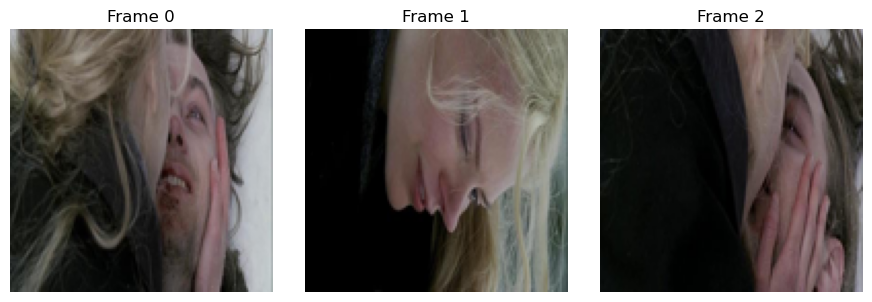

In [17]:
# Pick a random window from val if available; else from train
if val_ds_raw is not None:
    base_ds = val_ds_raw
else:
    base_ds = train_ds_raw

# Convert unbatched dataset to list indices is expensive; instead, just iterate and pick a sample
# For visualization, just take the first element
vis_sample = next(iter(base_ds))

images = vis_sample["images"][np.newaxis, ...]        # (1, T, H, W, 3)
caption_ids = vis_sample["caption_ids"][np.newaxis, ...]  # (1, T, L)
caption_mask = vis_sample["caption_mask"][np.newaxis, ...]  # (1, T, L)
tgt_caption_ids = vis_sample["tgt_caption_ids"]       # (L,)

reason_ids = vis_sample.get("reason_ids", None)
reason_mask = vis_sample.get("reason_mask", None)
if reason_ids is not None:
    reason_ids = reason_ids[np.newaxis, ...]          # (1, Lr)
    reason_mask = reason_mask[np.newaxis, ...]

# Generate k+1 caption
gen_ids = model.generate_next_caption(
    images=images,
    caption_ids=caption_ids,
    caption_mask=caption_mask,
    reason_ids=reason_ids,
    reason_mask=reason_mask,
    max_len=dataset_cfg["max_caption_len"],
)

gen_ids = gen_ids[0].numpy()
gt_ids = tgt_caption_ids.numpy()

pred_caption = decode_caption(gen_ids, tokenizer)
gt_caption = decode_caption(gt_ids, tokenizer)

print("Ground Truth (k+1) Caption:\n", gt_caption)
print("\nPredicted (k+1) Caption:\n", pred_caption)

# Visualize the k input frames
T_in = images.shape[1]
plt.figure(figsize=(3 * T_in, 3))
for t in range(T_in):
    plt.subplot(1, T_in, t + 1)
    img_np = images[0, t]  # (H, W, 3), already in [0,1]
    plt.imshow(img_np)
    plt.axis("off")
    plt.title(f"Frame {t}")
plt.tight_layout()
plt.show()


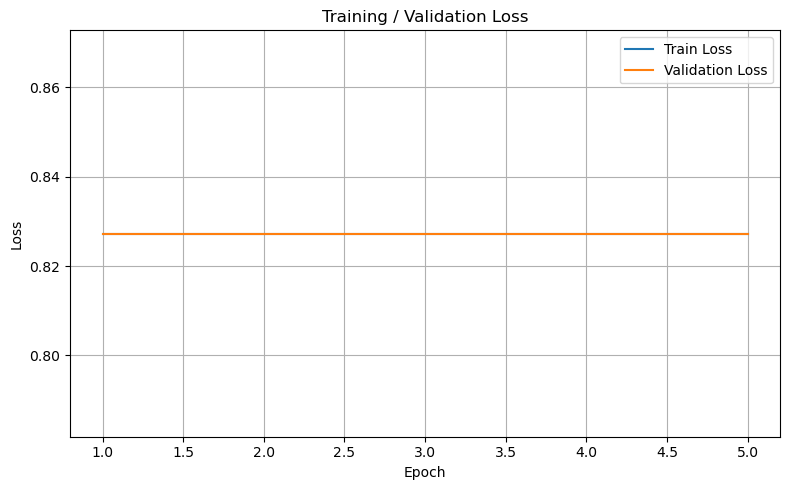

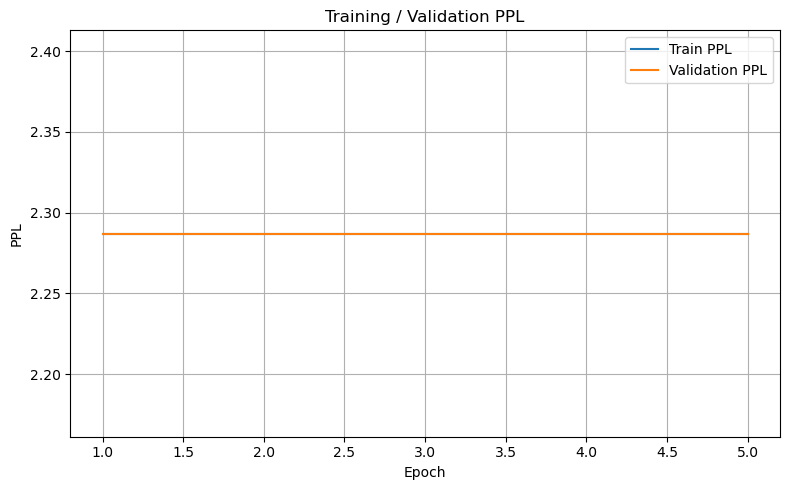

In [24]:
train_losses, val_losses = [], []
train_ppls, val_ppls = [], []

for epoch in range(epochs):
    ...
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_ppls.append(train_ppl)
    val_ppls.append(val_ppl)

import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training / Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_ppls, label="Train PPL")
plt.plot(epochs_range, val_ppls, label="Validation PPL")
plt.xlabel("Epoch")
plt.ylabel("PPL")
plt.title("Training / Validation PPL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()